In [27]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 

import sys
sys.path.append("../scripts")
from TrackReconstruction_functions import *

%matplotlib widget

In [16]:
def LoadPickle(f):
    # Load Bi data
    with open(f, 'rb') as pickle_file:
        Tracks = pickle.load(pickle_file)
        connections = pickle.load(pickle_file)
        connection_counts = pickle.load(pickle_file)
        
        return Tracks, connections, connection_counts

In [31]:

hits = pd.read_hdf(f"../data/GNN/ATPC_Tl_ion_1bar_5percent_filtered_GNN.h5", "MC/hits")
hits_diffused = pd.read_hdf(f"../data/GNN/ATPC_Tl_ion_1bar_5percent_filtered_GNN_diffused.h5", "MC/hits")
hits_true = pd.read_hdf(f"../data/GNN/ATPC_Tl_ion_1bar_5percent_filtered_GNN_true.h5", "MC/hits")
hits_true["z"] = hits_true["z"] + 6182/2
parts_true = pd.read_hdf(f"../data/GNN/ATPC_Tl_ion_1bar_5percent_filtered_GNN_true.h5", "MC/particles")
Tracks, connections, connection_counts= LoadPickle("../data/GNN/ATPC_Tl_ion_1bar_5percent_pkl_filtered_GNN.h5")
event_ids = hits.event_id.unique()

In [18]:
display(hits_true)

,event_id,x,y,z,energy,particle_id,n
928622,121440173,471.746002,3054.082031,1240.578369,0.000049,4,2
928623,121440173,471.698700,3053.646973,1241.123169,0.000054,4,1
928624,121440173,471.656555,3053.013184,1241.895264,0.000050,4,1
928625,121440173,471.663055,3052.441895,1242.715698,0.000414,4,4
928626,121440173,471.674347,3051.898438,1243.555054,0.000711,4,19
...,...,...,...,...,...,...,...
655432,1779510122,-53.604179,1630.979370,-2236.517334,0.000476,795,23
655433,1779510122,-53.602249,1630.978882,-2236.516846,0.000358,795,17
655434,1779510122,-49.111702,1633.913940,-2245.696045,0.000548,322,16
655435,1779510122,-49.116749,1633.907471,-2245.704834,0.001750,322,64


In [19]:
for e in np.arange(11,30,1):

    fig = plt.figure()

    # e = 11
    evid = event_ids[e]
    event = hits[hits.event_id == evid]
    event.index = event.id
    Track = Tracks[evid]
    connection_count = connection_counts[evid]

    # --- Second plot: Example scatter plot ---
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.scatter(event['x'], event['y'], event['z'],c="k", s=0.1)
    plot_tracks_3D(ax1, event['x'], event['y'], event['z'], connection_count, Track)
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_ylabel("Z")
    # ax1.set_title(f"True with Track Reco {evid}")
    plt.close()

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
284851,699660415,1,Tl208,1,0,2401.262207,-2000.336182,2075.740723,0.000000,2401.262207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,none,RadioactiveDecay
284852,699660415,4,e-,0,1,2401.262207,-2000.336182,2075.740723,0.000477,2401.409424,...,0.816651,-0.617746,0.109978,0.000000,-0.000000,-0.000000,0.638673,0.481438,RadioactiveDecay,eIoni
284853,699660415,3,anti_nu_e,0,1,2401.262207,-2000.336182,2075.740723,0.000477,-138623.578125,...,-0.502886,-0.349688,-0.988034,-0.502886,-0.349688,-0.988034,1.162492,325999.062500,RadioactiveDecay,Transportation
284854,699660415,2,Pb208[3197.711],0,1,2401.262207,-2000.336182,2075.740723,0.000477,2401.262207,...,-0.313765,0.967432,0.878055,-0.000000,0.000000,0.000000,0.000005,0.000000,RadioactiveDecay,RadioactiveDecay
284855,699660415,6,gamma,0,2,2401.262207,-2000.336182,2075.740723,0.000477,60377.519531,...,-0.571729,0.109440,0.035461,0.000000,-0.000000,0.000000,0.583188,429517.437500,RadioactiveDecay,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285540,699660415,689,e-,0,67,1846.278198,-1092.943237,2059.565430,3.556784,1846.277710,...,-0.003464,-0.000487,-0.000677,-0.000000,-0.000000,-0.000000,0.000012,0.000550,eIoni,msc
285541,699660415,688,e-,0,67,1846.278198,-1092.943237,2059.565430,3.556784,1846.278564,...,0.002110,0.000064,0.002870,0.000000,0.000000,0.000000,0.000012,0.000672,eIoni,msc
285542,699660415,687,e-,0,67,1846.278198,-1092.943237,2059.565430,3.556784,1846.277344,...,-0.005735,0.015308,0.014315,-0.000000,0.000000,0.000000,0.000462,0.011326,eIoni,eIoni
285543,699660415,686,e-,0,67,1846.278198,-1092.943237,2059.565430,3.556784,1846.278687,...,-0.002603,0.009669,-0.001742,0.000000,-0.000000,-0.000000,0.000101,0.004413,eIoni,eIoni


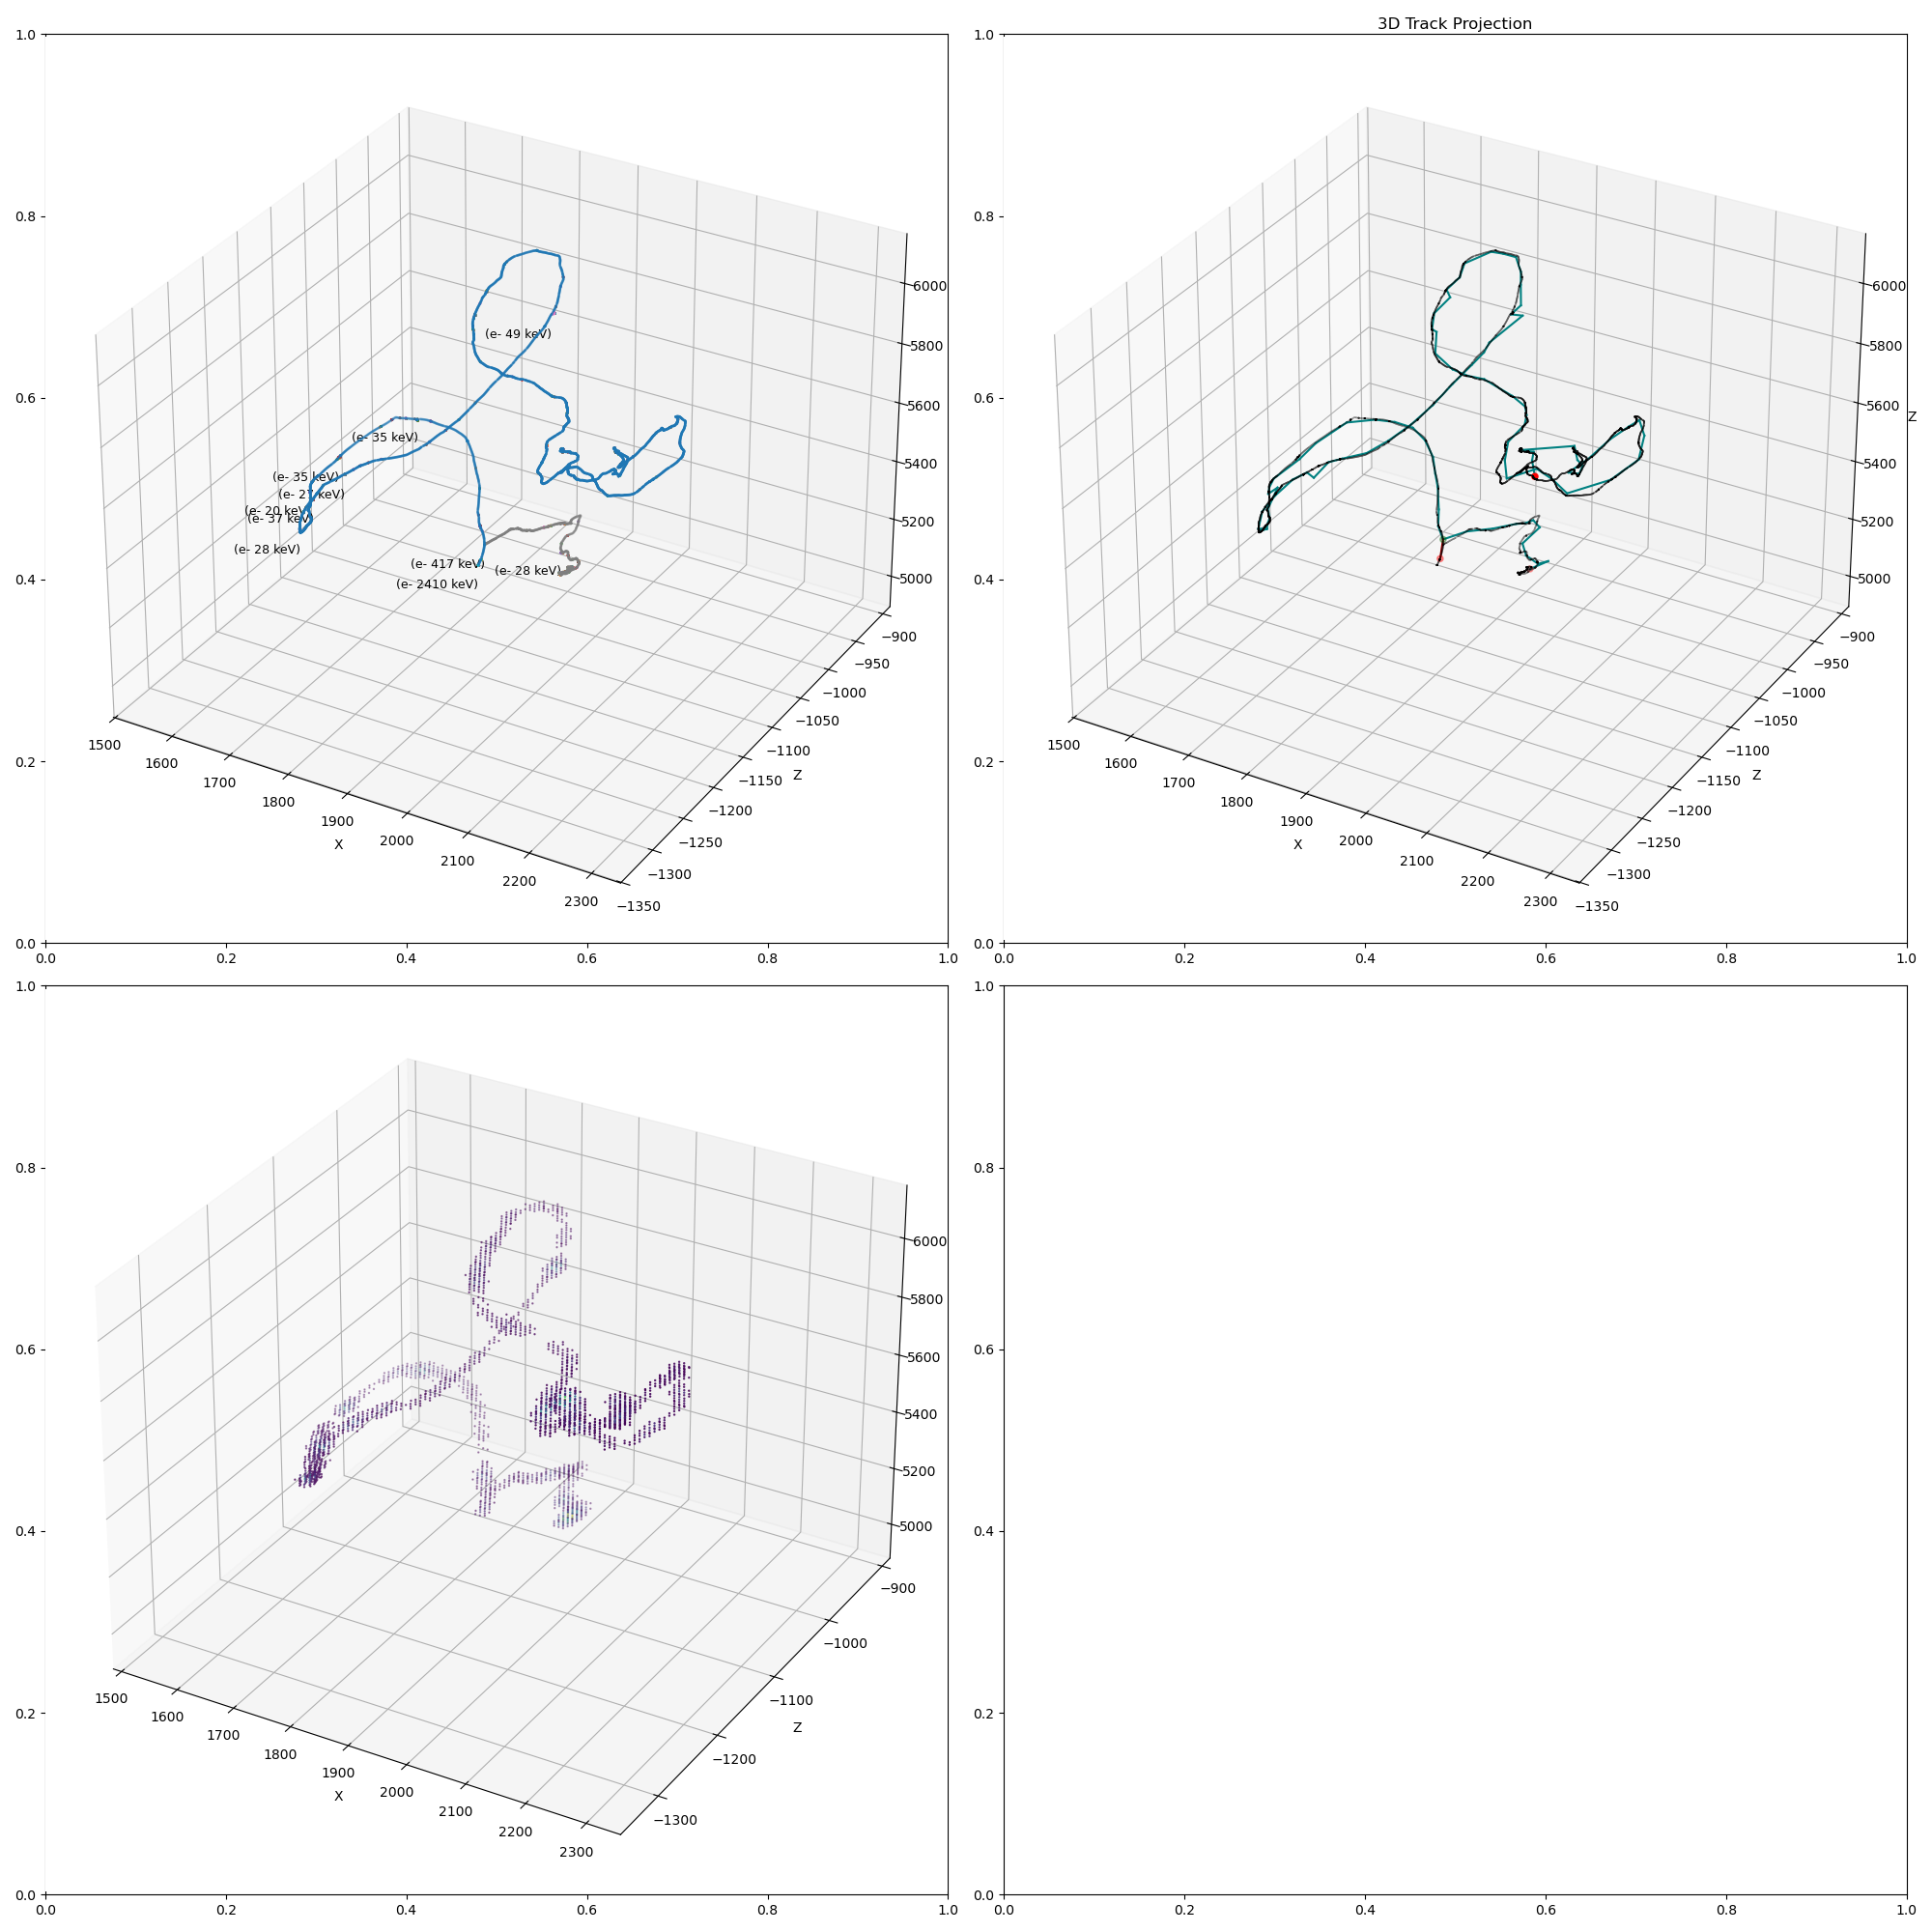

In [39]:
# 3D Projection
# plt.figure()
# Create two side-by-side subplots

evid = event_ids[4]
event = hits[hits.event_id == evid]
event.index = event.id
Track = Tracks[evid]
connection_count = connection_counts[evid]
event_hits_true = hits_true[hits_true.event_id == evid]
event_parts_true = parts_true[parts_true.event_id == evid]
event_diffused_hits = hits_diffused[hits_diffused.event_id == evid]

display(event_parts_true)


fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# --- First plot: 3D Projection ---
ax_3D = fig.add_subplot(221, projection='3d')
for p in event_hits_true.particle_id.unique():

    ax_3D.scatter(event_hits_true[event_hits_true.particle_id == p]['x'], 
                  event_hits_true[event_hits_true.particle_id == p]['y'], 
                  event_hits_true[event_hits_true.particle_id == p]['z'], 
                  marker='o', s=1)

for index, row in event_parts_true[event_parts_true.kin_energy > 0.02].iterrows():
    Energy = round(row["kin_energy"] * 1000)
    particle_name = row["particle_name"]

    if particle_name == "gamma":
        continue

    ax_3D.text(row["initial_x"], row["initial_y"], row["initial_z"] + 3000, 
               f"({particle_name} {Energy} keV)", fontsize=9, ha='right', va='bottom', color='black')


ax_3D.set_xlabel("X")
ax_3D.set_ylabel("Y")
ax_3D.set_ylabel("Z")

# --- Second plot: Example scatter plot ---
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(event_hits_true['x'], event_hits_true['y'], event_hits_true['z'],c="k", s=0.1)
plot_tracks_3D(ax2, event['x'], event['y'], event['z'], connection_count, Track)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_ylabel("Z")


# event_diffused_hits = CutandRedistibuteEnergy(event_diffused_hits, 0.0004)
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(event_diffused_hits['x'], event_diffused_hits['y'], event_diffused_hits['z'],c=event_diffused_hits['energy'], s=0.5)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_ylabel("Z")


plt.tight_layout()
plt.show()
